In [60]:
# Import the pandas library as pd
import pandas as pd

# Import the plotting library matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.style.use('classic')
%matplotlib inline

# Definition

GDP: The monetary value of all finished goods and services made within a country during a specific period. GDP provides an economic snapshot of a country, used to estimate the size of an economy and growth rate

Real GDP: GDP with adjustments for changes in inflation

GDP-Business Sector: GDP contributed by a sellers in the market for goods and services

GDP-Household Sector: GDP contribued by supplier and a consumer aspect

GDP-Government Sector: GDP Sector with governmental services such as financed through taxes or social contributions to the overall economy


# Objective

Analysis of the change in the GDP, Real GDP, and its sub sector change level before and after the epidemic

# Collect Data

In [61]:
# Download GDP data
GDP= pd.read_csv('https://fred.stlouisfed.org/data/GDP.txt',skiprows=18,sep='\s+',index_col=0,parse_dates = True)

# set GDP data equal to 'VALUE' column of GDP
GDP_data= GDP['VALUE']

# Compute GDP Growth rate
GDP_growth = GDP_data/GDP_data.shift(1)-1

# Download GDP Business Sector data
GDP_business= pd.read_csv('https://fred.stlouisfed.org/data/A195RC1Q027SBEA.txt',skiprows=14,sep='\s+',index_col=0,parse_dates = True)

# set GDP business sector data equal to 'VALUE' column of GDP Business Sector 
GDP_business_data= GDP_business['VALUE']

# GDP Business Sector Increasing rate
GDP_Business_growth = GDP_business_data/GDP_business_data.shift(1)-1


# Download GDP Household Sector Data
GDP_household= pd.read_csv('https://fred.stlouisfed.org/data/A193RC1Q027SBEA.txt',skiprows=14,sep='\s+',index_col=0,parse_dates = True)

# set GDP Household sector data equal to 'VALUE' column of GDP Household
GDP_household_data= GDP_household['VALUE']

# GDP Household Increasing rate
GDP_Household_growth = GDP_household_data/GDP_household_data.shift(1)-1


# Download GDP Government Sector Data
GDP_Government= pd.read_csv('https://fred.stlouisfed.org/data/A765RC1Q027SBEA.txt',skiprows=14,sep='\s+',index_col=0,parse_dates = True)

# # set GDP government data equal to 'VALUE' column of GDP government Sector
GDP_Government_data= GDP_Government['VALUE']

# GDP Government Sector Increasing rate
GDP_Government_growth = GDP_Government_data/GDP_Government_data.shift(1)-1

# Download Real GDP data
Real_GDP= pd.read_csv('https://fred.stlouisfed.org/data/GDPC1.txt',skiprows=18,sep='\s+',index_col=0,parse_dates = True)

# set Real GDP data equal to 'VALUE' column of Real GDP
Real_GDP_data= Real_GDP['VALUE']

# Real GDP Increasing rate
Real_GDP_growth = Real_GDP_data/Real_GDP_data.shift(1)-1



# Comparison between GDP and Real GDP over the past three years

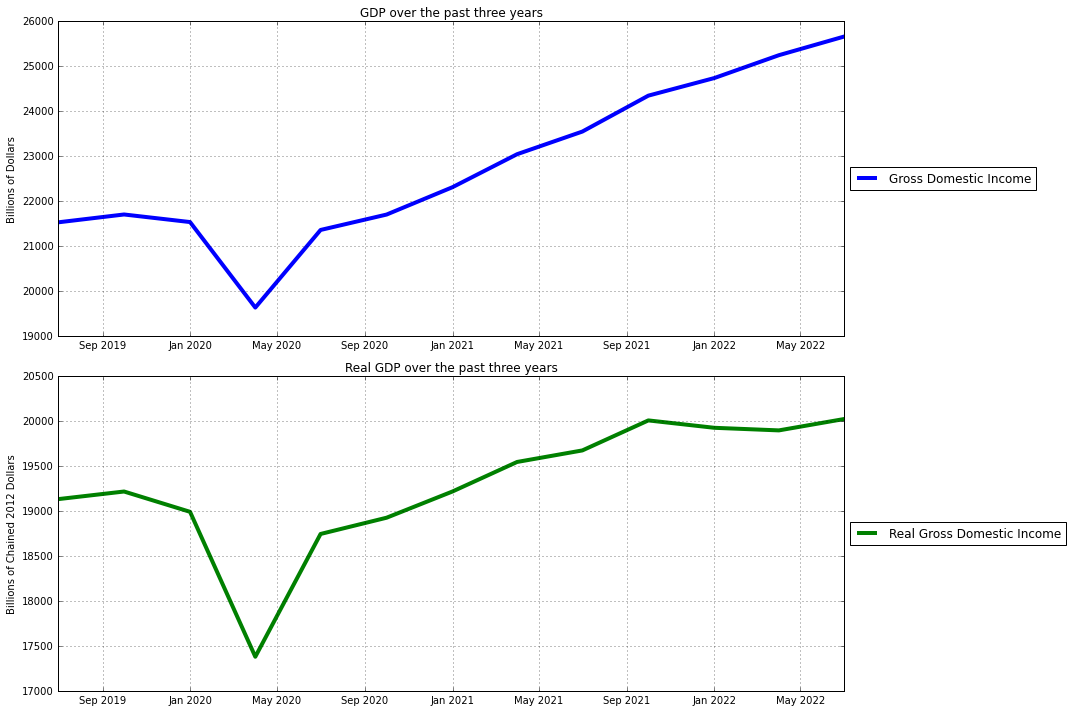

In [45]:
fig = plt.figure(figsize=(15,10))

# Auto-rotate the x-axis labels
fig.autofmt_xdate()


# Create axis 1 and plot with title
ax1 = fig.add_subplot(2,1,1)
ax1.plot(GDP_data[-13:],'b-',lw=4,label='Gross Domestic Income')
ax1.grid()

ax1.set_ylabel('Billions of Dollars')
ax1.set_title('GDP over the past three years')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Create axis 2 and plot with title
ax2 = fig.add_subplot(2,1,2)
ax2.plot(Real_GDP_data[-13:],'g-',lw=4,label='Real Gross Domestic Income')
ax2.grid()
ax2.set_ylabel('Billions of Chained 2012 Dollars')
ax2.set_title('Real GDP over the past three years')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Improve the spacing between the plots
plt.tight_layout()


# Comparison between GDP three major sectors: Business, Household, and Government over the past three years

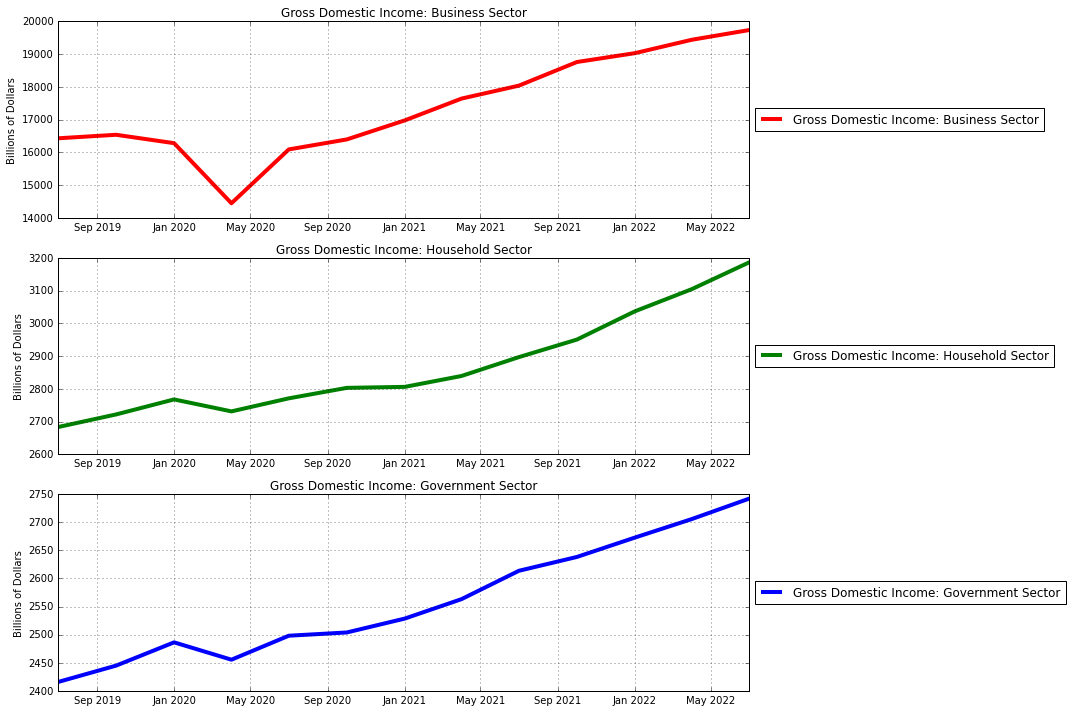

In [62]:
fig = plt.figure(figsize=(15,10))


# Create axis 1 and plot with title
ax1 = fig.add_subplot(3,1,1)
ax1.plot(GDP_business_data[-13:],'r-',lw=4,label='Gross Domestic Income: Business Sector')
ax1.grid()
ax1.set_title('Gross Domestic Income: Business Sector')
ax1.set_ylabel('Billions of Dollars')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Create axis 2 and plot with title
ax2 = fig.add_subplot(3,1,2)
ax2.plot(GDP_household_data[-13:],'g-',lw=4,label='Gross Domestic Income: Household Sector')
ax2.set_title('Gross Domestic Income: Household Sector')
ax2.set_ylabel('Billions of Dollars')
ax2.grid()
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Create axis 3 and plot with title
ax3 = fig.add_subplot(3,1,3)
ax3.plot(GDP_Government_data[-13:],'b-',lw=4,label='Gross Domestic Income: Government Sector')
ax3.set_title('Gross Domestic Income: Government Sector')
ax3.set_ylabel('Billions of Dollars')
ax3.grid()
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Improve the spacing between the plots
plt.tight_layout()


In [39]:
# GDP Sector proportion
print(GDP_business_data[-13]/GDP_data[-13])
print(GDP_household_data[-13]/GDP_data[-13])
print(GDP_Government_data[-13]/GDP_data[-13])

0.7631788905722359
0.12462892742231631
0.11219218200544782


# Annual Average Growth rate of GDP and Real GDP over the past three years

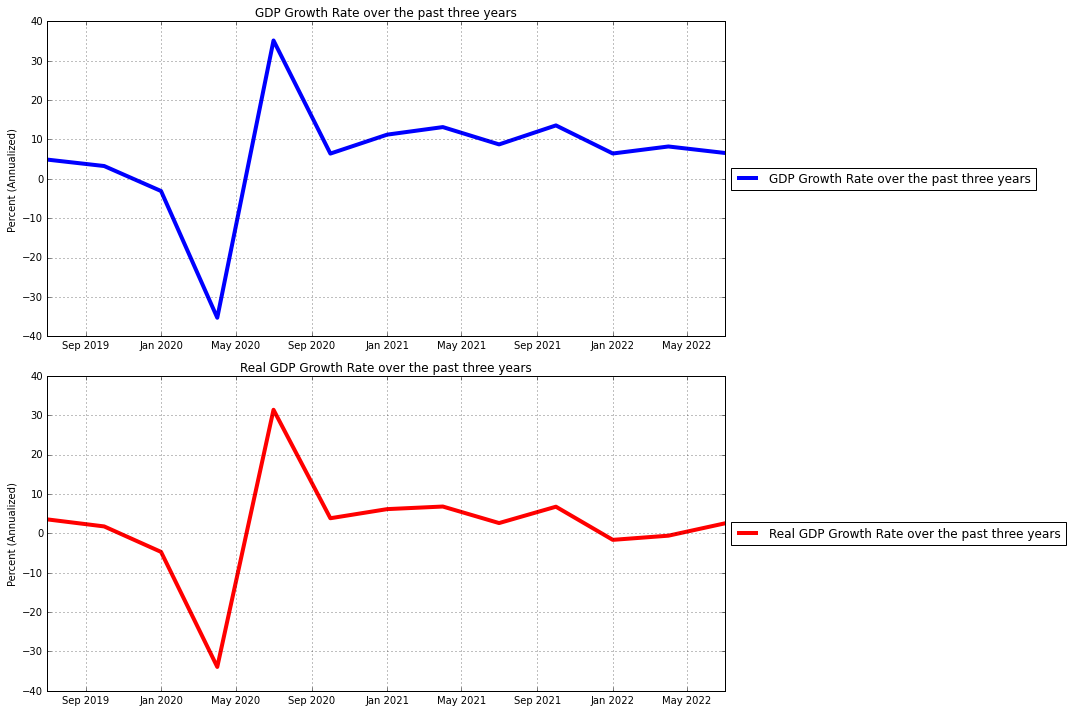

In [63]:
fig = plt.figure(figsize=(15,10))


# Create axis 1 and plot with title
ax1 = fig.add_subplot(2,1,1)
ax1.plot(100*4*GDP_growth [-13:],'b-',lw=4,label='GDP Growth Rate over the past three years')
ax1.grid()
ax1.set_ylabel('Percent (Annualized)')
ax1.set_title('GDP Growth Rate over the past three years')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Create axis 2 and plot with title
ax2 = fig.add_subplot(2,1,2)
ax2.plot(100*4*Real_GDP_growth[-13:],'r-',lw=4,label='Real GDP Growth Rate over the past three years')
ax2.grid()
ax2.set_ylabel('Percent (Annualized)')
ax2.set_title('Real GDP Growth Rate over the past three years')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Improve the spacing between the plots
plt.tight_layout()


# Comparison between GDP three major sectors: Business, Household, and Government growth rate over the past three years

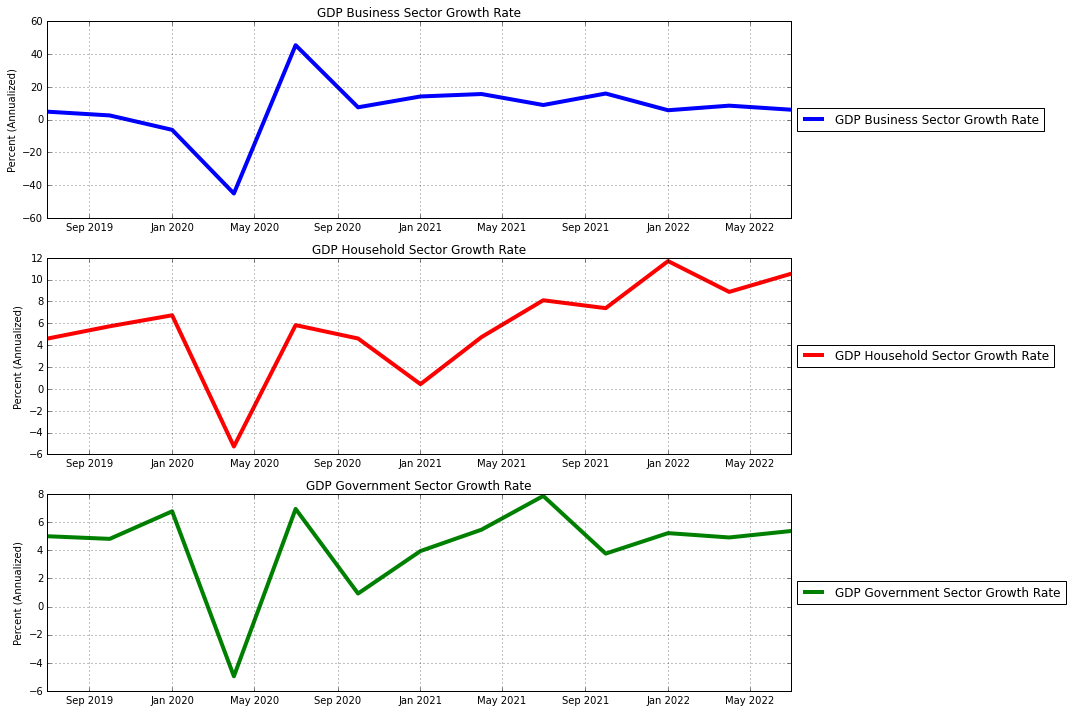

In [65]:
fig = plt.figure(figsize=(15,10))


# Create axis 1 and plot with title
ax1 = fig.add_subplot(3,1,1)
ax1.plot(100*4*GDP_Business_growth[-13:],'b-',lw=4,label='GDP Business Sector Growth Rate')
ax1.grid()
ax1.set_ylabel('Percent (Annualized)')
ax1.set_title('GDP Business Sector Growth Rate')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Create axis 2 and plot with title
ax2 = fig.add_subplot(3,1,2)
ax2.plot(100*4*GDP_Household_growth[-13:],'r-',lw=4,label='GDP Household Sector Growth Rate')
ax2.grid()
ax2.set_ylabel('Percent (Annualized)')
ax2.set_title('GDP Household Sector Growth Rate')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Create axis 3 and plot with title
ax3 = fig.add_subplot(3,1,3)
ax3.plot(100*4*GDP_Government_growth[-13:],'g-',lw=4,label='GDP Government Sector Growth Rate')
ax3.grid()
ax3.set_ylabel('Percent (Annualized)')
ax3.set_title('GDP Government Sector Growth Rate')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Improve the spacing between the plots
plt.tight_layout()


In [66]:
print('GDP Growth Rate over previous 3 years:  ',round(100*((GDP_data.iloc[-1]/GDP_data.iloc[-1-3*4])**(1/3)-1),5),'%')
print('GDP Business Sector Growth over previous 3 years: ',round(100*((GDP_business_data.iloc[-1]/GDP_business_data.iloc[-1-3*4])**(1/3)-1),5),'%')
print('GDP Household Sector Growth Rate over previous 3 years: ',round(100*((GDP_household_data.iloc[-1]/GDP_household_data.iloc[-1-3*4])**(1/3)-1),5),'%')
print('GDP Government Sector Growth Rate over previous 3 years:',round(100*((GDP_household_data.iloc[-1]/GDP_Government_data.iloc[-1-3*4])**(1/3)-1),5),'%')
print('Real GDP Growth Rate over previous 3 years: ',round(100*((Real_GDP_data.iloc[-1]/Real_GDP_data.iloc[-1-3*4])**(1/3)-1),5),'%')

GDP Growth Rate over previous 3 years:   6.02552 %
GDP Business Sector Growth over previous 3 years:  6.29493 %
GDP Household Sector Growth Rate over previous 3 years:  5.88732 %
GDP Government Sector Growth Rate over previous 3 years: 9.66365 %
Real GDP Growth Rate over previous 3 years:  1.52861 %


In [18]:
# Approximate standard deviation over last three years 
print(GDP_data[-13:].std())
print(GDP_business_data[-13:].std())
print(GDP_household_data[-13:].std())
print(GDP_Government_data[-13:].std())
print(Real_GDP_data[-13:].std())

1800.1889337565126
1557.0133171795815
156.86709375410433
105.88135074053895
721.0206082814584


In [19]:
# Approximate average level of GDP over last three years 
print(GDP_data[-13:].mean())
print(GDP_business_data[-13:].mean())
print(GDP_household_data[-13:].mean())
print(GDP_Government_data[-13:].mean())
print(Real_GDP_data[-13:].mean())

22799.449076923076
17371.251307692306
2869.099769230769
2559.0978461538466
19281.809307692307


For GDP we choose both household, business, and Government sector as they are three means of ways that directly emphasize the health level of GDP

GDP is one of the most important metrics for evaluating the economic activity, stability, and growth of goods and services in an economy. For the GDP measurement, we choose both nominal and Real GDP with Seasonally Adjusted Annual Rate for measurement to both take account the effect of inflation or not. Also, we have chosen three sub majority sector of GDP components: Business, Household and Goverment by referring to expenditure approach where GDP=C+I+G+Net export; The household sector acts as a supplier and a consumer, business sector acts as a sellers role in the market for goods and services, and the government sector consists of institutional units of central government, state governments, and local governments includes the provides  governmental services such as financed through taxes or other government spending's contributions to the overall economy. 

For the report, we choose past three years data in covid period to identify the absolute gdp and other relevant sub components to identify the united overall economy level. In the past three years from 2019/7-2022/7, we can view that GDP has a tremendous growth level from an absolute number of 21531.839 to 25663.289, and the real GDP grows from 19130.932 to 20021.721 billions of dollars, and their past average three year average annual growth rate is respectively 6.02552 % and 1.52861 %, which indicate a strong growth even under the effect of pandemic. For the other three major sectors, they also have the respective 6.29493 %, 5.88732 %,  9.66365 % average annual increase level. 

# The influence and dependence level betwen GDP, real_GDP, GDP Business Sector, GDP Household Sector, GDP Government Sector

In [67]:
a=GDP.rename(columns = {"VALUE":"GDP"})
b=Real_GDP.rename(columns = {"VALUE":"real_GDP"})
c=GDP_business.rename(columns = {"VALUE":"GDP business Sector"})
d=GDP_household.rename(columns = {"VALUE":"GDP Household Sector"})
e=GDP_Government.rename(columns={"VALUE":"GDP Government Sector"})
df1=pd.concat([a,b,c, d,e], axis=1)

In [68]:
# evaluate the histrical correlation
df1.corr()

,GDP,real_GDP,GDP business Sector,GDP Household Sector,GDP Government Sector
GDP,1.000000,0.980755,0.999875,0.998395,0.997409
real_GDP,0.980755,1.000000,0.980375,0.973438,0.986227
GDP business Sector,0.999875,0.980375,1.000000,0.997621,0.996373
GDP Household Sector,0.998395,0.973438,0.997621,1.000000,0.996503
GDP Government Sector,0.997409,0.986227,0.996373,0.996503,1.000000


From the correlation table, we can visualize the strong effect of each components of GDP Sub sector contribute to the overall GDP increasing level. 

Since GDP Government Sector Growth Rate over previous 3 years is 9.66365 % which is the highest increasing components in contributing the GDP overall growth level, we are interested in testing its correlation effect to GDP.

In [69]:
# Create a variable 'X' to be the independent variable of the OLS model. Do not add a constant to X
X = df1['GDP Government Sector']

# Create a variable 'Y' to be the dependent variable of the OLS model.
Y = df1['GDP']

# Create a variable called 'model' that initializes the OLS model
model = sm.OLS(Y,X)

# Create a variable called 'results' that stores the results of the estimated OLS model
results = model.fit()

# Print output of summary() method of results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          9.666e+04
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                        0.00
Time:                        10:28:36   Log-Likelihood:                         -2337.6
No. Observations:                 303   AIC:                                      4677.
Df Residuals:                     302   BIC:                                      4681.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [70]:
# Create a variable 'X' to be the independent variable of the OLS model. Do not add a constant to X
X = df1['GDP business Sector']

# Create a variable 'Y' to be the dependent variable of the OLS model.
Y = df1['GDP']

# Create a variable called 'model' that initializes the OLS model
model = sm.OLS(Y,X)

# Create a variable called 'results' that stores the results of the estimated OLS model
results = model.fit()

# Print output of summary() method of results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.303e+06
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                        0.00
Time:                        10:34:48   Log-Likelihood:                         -1857.7
No. Observations:                 303   AIC:                                      3717.
Df Residuals:                     302   BIC:                                      3721.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [72]:
# Create a variable 'X' to be the independent variable of the OLS model. Do not add a constant to X
X = df1['GDP Household Sector']

# Create a variable 'Y' to be the dependent variable of the OLS model.
Y = df1['GDP']

# Create a variable called 'model' that initializes the OLS model
model = sm.OLS(Y,X)

# Create a variable called 'results' that stores the results of the estimated OLS model
results = model.fit()

# Print output of summary() method of results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          9.673e+04
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                        0.00
Time:                        10:35:06   Log-Likelihood:                         -2337.5
No. Observations:                 303   AIC:                                      4677.
Df Residuals:                     302   BIC:                                      4681.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

For the above OLS regression results, we confirm our belief that GDP Government Sector Contributes most during the COVID period, which is due to the support of public service and as well as the maintanence to the stability of general US Economy

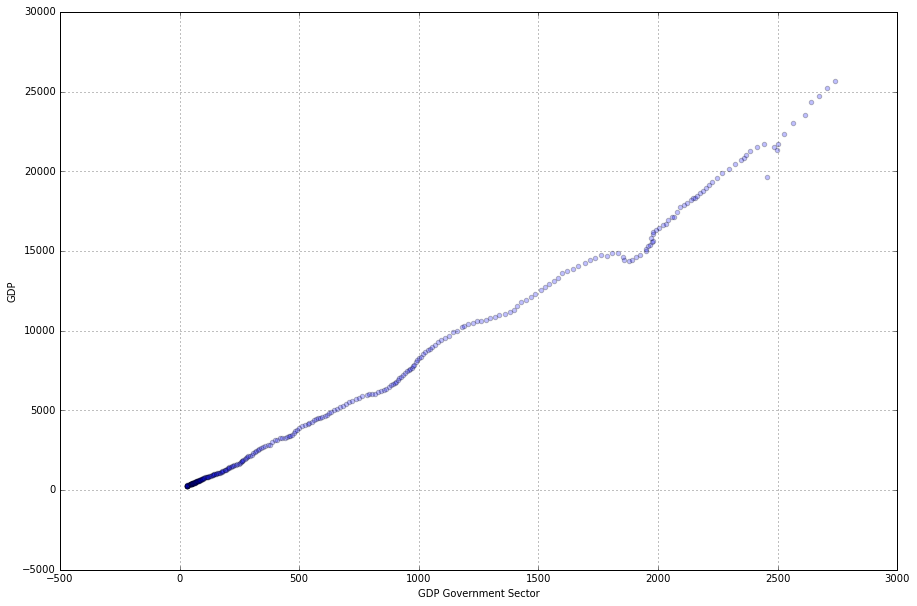

In [53]:
# Create figure and axis
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)

# Scatter plot of data inflation against money growth
ax.scatter(df1['GDP Government Sector'],df1['GDP'],s=20,alpha = 0.25)
ax.set_xlabel('GDP Government Sector')
ax.set_ylabel('GDP')
ax.grid()

# Unemployment Rate and CPI

# Definition

Unemployment Rate: The percentage of the population level that are actively looking for work.

Participation Rate: The percentage of the population level that work or are actively looking for work.

Employment-Population Ratio: The percentage of the population level that work.

CPI: The change in the prices of a basket of goods and services that are typically purchased by specific groups of households, which is a measure of inflation

# Objective

# Collect Data

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import seaborn as sns
plt.style.use('classic')
%matplotlib inline

In [55]:
# Use API fredapi
from fredapi import Fred  # pip install fredapi

# Create account with FRED and get an API key
fred = Fred(api_key='5e3c6e87672056da772dcad79d489659')

# Set observation start date
observation_start = '2019-1-1'

In [56]:
# Get the unemployment rate data
unrate = fred.get_series('UNRATE', observation_start)

# Get the partcipation rate data
partrate = fred.get_series('CIVPART', observation_start)

# Get the employment to population ratio data 
emratio = fred.get_series('EMRATIO', observation_start)

# Get the inflation, consumer prices rate data
cpi = fred.get_series('CPIAUCSL', observation_start)

# Visualizing Data

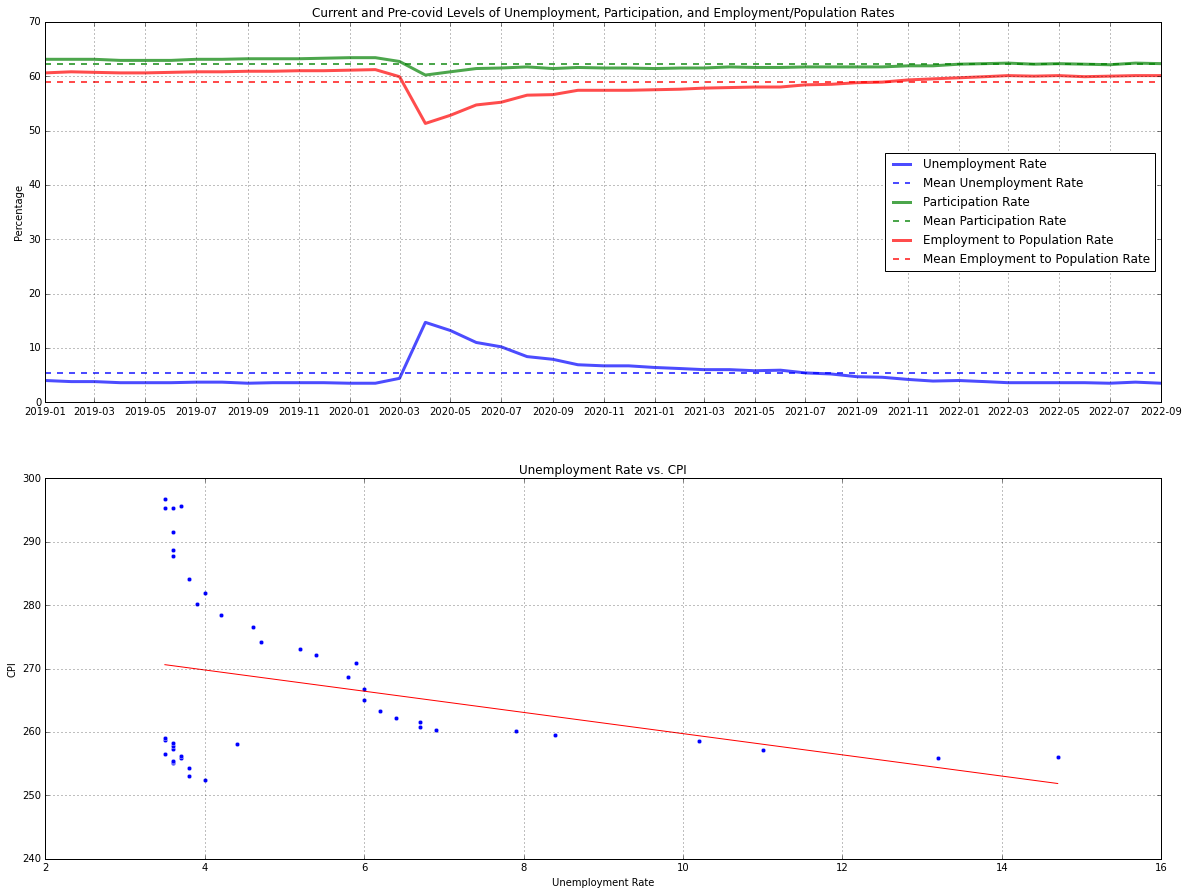

In [57]:
# Current and pre-pandemic levels of Unemployment, Participation and Employment/Population rates
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(2,1,1)
ax.plot(unrate, 'b-', lw=3, alpha = 0.7, label='Unemployment Rate')
ax.axhline(unrate.mean(), ls='--', c='b', lw=2, alpha = 0.7, label='Mean Unemployment Rate')
ax.plot(partrate, 'g-', lw=3, alpha = 0.7, label='Participation Rate')
ax.axhline(partrate.mean(), ls='--', c='g', lw=2, alpha = 0.7, label='Mean Participation Rate')
ax.plot(emratio, 'r-', lw=3, alpha = 0.7, label='Employment to Population Rate')
ax.axhline(emratio.mean(), ls='--', c='r', lw=2, alpha = 0.7, label='Mean Employment to Population Rate')
ax.set_title('Current and Pre-covid Levels of Unemployment, Participation, and Employment/Population Rates')
ax.set_ylabel('Percentage')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.legend(loc='center right')
ax.grid()

bx = fig.add_subplot(2,1,2)
bx = sns.scatterplot(x=unrate, y=cpi)
bx.set_title('Unemployment Rate vs. CPI')
bx.set_ylabel('CPI')
bx.set_xlabel('Unemployment Rate')
plt.plot(np.unique(unrate), np.poly1d(np.polyfit(unrate, cpi, 1))
         (np.unique(unrate)), color='red')
plt.grid()

# Analyzing Data

In [58]:
diff = emratio[-1] - emratio[0]
diff

-0.5

While the Unemployment Rate has fallen back to the pre-pandemic levels, the participation and employment/population rates have not. We have We have 0.5% fewer work-eligable civilians that work now compared to Jan 2019.

In [59]:
data = pd.concat([unrate, cpi], axis=1)
data.columns = ['Unemployment Rate', 'CPI']
data.corr()

,Unemployment Rate,CPI
Unemployment Rate,1.00000,-0.31907
CPI,-0.31907,1.00000
